# Introduction to Neural Networks
(https://class.coursera.org/neuralnets-2012-001)

## Neurons
$y$ be the output, $b$ the bias, $i$ the index of each input to the neuron, $x_i$ the $i$th input and $w_i$ the $i$th weight.



### Linear Neuron
$$y=b+\sum_ix_iw_i$$

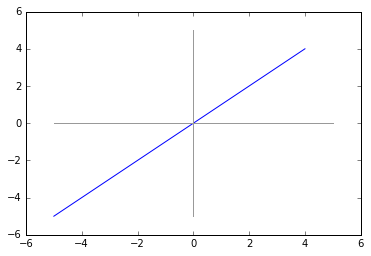

In [9]:
# EXECUTE ME FIRST!
%matplotlib inline
import random
import math
import scipy.integrate as integrate
import numpy as np
import scipy.special as special
from numpy.random import normal
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
from numpy.linalg import inv, norm

def plot_center(X, Y, ax=None):
    x1 = [-X, X]
    y1 = [0, 0]
    
    x2 = [0, 0]
    y2 = [-Y, Y]
    c = '#999999'
    if ax is None:
        plt.plot(x1, y1, c=c)
        plt.plot(x2, y2, c=c)
    else:
        ax.plot(x1, y1, c=c)
        ax.plot(x2, y2, c=c)

def linear_neuron(x, w, b=0):
    return b + np.sum(x*w)

x = list(range(-5, 5, 1))
y = [linear_neuron(i, 1) for i in x]
plt.plot(x, y)

plot_center(5, 5)

plt.show()

### Binary thresold neuron
(McCulloch-Pitts)
Given a thresold $\theta$

$$z=b+\sum_ix_iw_i\\
y = \biggr\{_{0 \ \mathrm{otherwise}}^{1 \ \mathrm{if} \ z \geq \theta}
$$

or:
$$
y = \biggr\{_{0 \ \mathrm{otherwise}}^{1 \ \mathrm{if} \ z \geq 0}, \ \ \theta = -b
$$

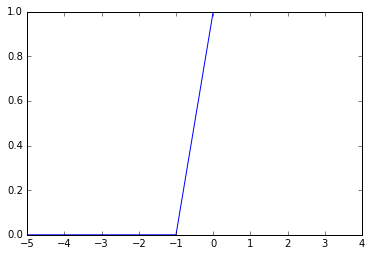

In [4]:
def bin_thresold_neuron(x, w, b=0, theta=0):
    z = linear_neuron(x, w, b)
    if z >= theta:
        return 1
    return 0

x = list(range(-5, 5, 1))
y = [bin_thresold_neuron(i, 1) for i in x]
plt.plot(x, y)

#plot_center(5, 1)

plt.show()

### Rectified linear neuron

$$z=b+\sum_ix_iw_i\\
y = \biggr\{_{0 \ \mathrm{otherwise}}^{z \ \mathrm{if} \ z > 0}
$$

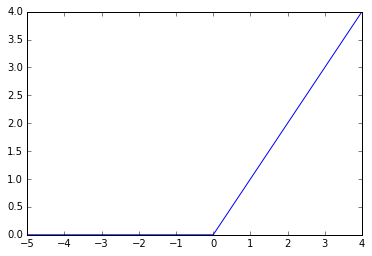

In [5]:
def rect_linear_neuron(w, x, b=0):
    z = linear_neuron(w, x, b)
    if z > 0:
        return z
    return 0

x = list(range(-5, 5, 1))
y = [rect_linear_neuron(i, 1) for i in x]
plt.plot(x, y)
plt.show()

### Sigmoid neuron

using Logistic function:
$$z=b+\sum_ix_iw_i\\
y = \frac{1}{1+exp(-z)}
$$

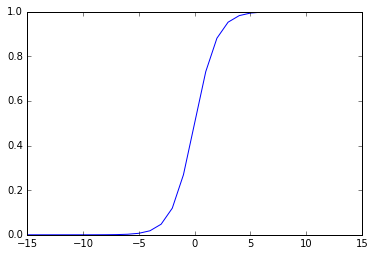

In [6]:
def sigmoid_neuron(w, x, b=0):
    z = linear_neuron(w, x, b)
    return 1.0 / (1 + math.e**(-z))

x = list(range(-15, 15, 1))
y = [sigmoid_neuron(i, 1) for i in x]
plt.plot(x, y)
plt.show()

### Stochastic binary neuron

using Logistic function:
$$z=b+\sum_ix_iw_i\\
\Pr(s=1) = \frac{1}{1+exp(-z)}
$$

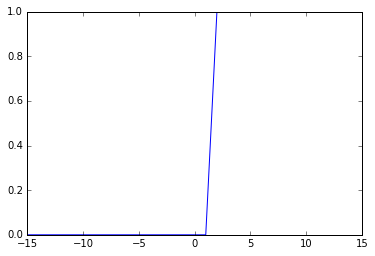

In [8]:
def stoch_binary_neuron(w, x, b=0):
    pr = sigmoid_neuron(w, x, b)
    if random.random() < pr:
        return 1
    return 0

x = list(range(-15, 15, 1))
y = [stoch_binary_neuron(i, 1) for i in x]
plt.plot(x, y)
plt.show()

## Types of NN

### Feed-forward neural network

* **First layer**: Input layer
* **Last layer**: Output layer
* **Hidden layer**: If there is more than one hidden layer $\rightarrow$ "deep" neural network

Compute A series of transformations that change the similarities between classes
* The activities of the neurons in each layer are a non-linear function of the activies in the layer below

### Recurrent networks

* Have directed cycles in their connection graph
    * One can sometimes go back to where one started
* Can have complicated dynamcis $\rightarrow$ makes them difficult to train

* Natural way to model sequential data
    * Equivalent to very deep nets with one hidden layer per time slice
    * Except: they use the same weights at every time splice and they get input at every time slice
    
### Symmetrically connected networks

* Like RNN, but the connections between units are symmetrical (they have the same weight in both directions)
    * Easier to analyze
    * They obey an energy function and are thus more restricted
        * Cannot model cycles